<a href="https://colab.research.google.com/github/MinhajAbedin/RResearch-paper-on-weather/blob/main/weather_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/Paper/Weather Code/weather 2.csv', index_col="DATE")

In [ ]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1980-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",70.0,70.0,NaN,NaN,18.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1980-03-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",70.0,60.0,NaN,NaN,2212.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1980-03-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.0,30.0,NaN,NaN,706.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,40.0,NaN,NaN,1700.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",90.0,100.0,NaN,NaN,1012.0,0.11,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.96,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.51,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,10.51,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preprocessing

In [ ]:
weather.apply(pd.isnull).sum()

STATION        0
NAME           0
ACMH        9901
ACSH        9900
AWND        1403
FMTM        5680
PGTM        5173
PRCP           0
SNOW           0
SNWD           0
TAVG        9411
TMAX           0
TMIN           0
TSUN       15775
WDF1        9905
WDF2        5905
WDF5        5988
WDFG       10683
WDFM       15803
WESD        9824
WSF1        9902
WSF2        5905
WSF5        5989
WSFG        9977
WSFM       15803
WT01        9763
WT02       14882
WT03       14713
WT04       15529
WT05       15445
WT06       15662
WT07       15696
WT08       13600
WT09       15690
WT11       15790
WT13       13619
WT14       14917
WT15       15762
WT16       10750
WT17       15744
WT18       14905
WT19       15803
WT21       15799
WT22       15755
WV01       15803
dtype: int64

In [ ]:
null_pct=weather.apply(pd.isnull).sum()/weather.shape[0]

In [ ]:
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.626487
ACSH       0.626424
AWND       0.088775
FMTM       0.359403
PGTM       0.327322
PRCP       0.000000
SNOW       0.000000
SNWD       0.000000
TAVG       0.595482
TMAX       0.000000
TMIN       0.000000
TSUN       0.998165
WDF1       0.626740
WDF2       0.373640
WDF5       0.378891
WDFG       0.675968
WDFM       0.999937
WESD       0.621615
WSF1       0.626550
WSF2       0.373640
WSF5       0.378955
WSFG       0.631296
WSFM       0.999937
WT01       0.617755
WT02       0.941660
WT03       0.930967
WT04       0.982599
WT05       0.977284
WT06       0.991015
WT07       0.993166
WT08       0.860542
WT09       0.992787
WT11       0.999114
WT13       0.861744
WT14       0.943875
WT15       0.997342
WT16       0.680208
WT17       0.996203
WT18       0.943116
WT19       0.999937
WT21       0.999684
WT22       0.996900
WV01       0.999937
dtype: float64

In [ ]:
valid_columns = weather.columns[null_pct<.05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
weather = weather[valid_columns].copy()

In [ ]:
weather.columns = weather.columns.str.lower()

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1980-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,24,8
1980-03-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,12
1980-03-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40,15
1980-03-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,26
1980-03-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.11,0.0,0.0,43,33
...,...,...,...,...,...,...,...
2023-06-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,70,54
2023-06-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,70,49
2023-06-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77,50


In [ ]:
weather = weather.ffill()

In [ ]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [ ]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [ ]:
weather.index

Index(['1980-03-01', '1980-03-02', '1980-03-03', '1980-03-04', '1980-03-05',
       '1980-03-06', '1980-03-07', '1980-03-08', '1980-03-09', '1980-03-10',
       ...
       '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
       '2023-06-03', '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07'],
      dtype='object', name='DATE', length=15804)

In [ ]:
weather.index = pd.to_datetime(weather.index)

In [ ]:
weather.index

DatetimeIndex(['1980-03-01', '1980-03-02', '1980-03-03', '1980-03-04',
               '1980-03-05', '1980-03-06', '1980-03-07', '1980-03-08',
               '1980-03-09', '1980-03-10',
               ...
               '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01',
               '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
               '2023-06-06', '2023-06-07'],
              dtype='datetime64[ns]', name='DATE', length=15804, freq=None)

In [ ]:
weather.index.year.value_counts().sort_index()

1980    306
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    158
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

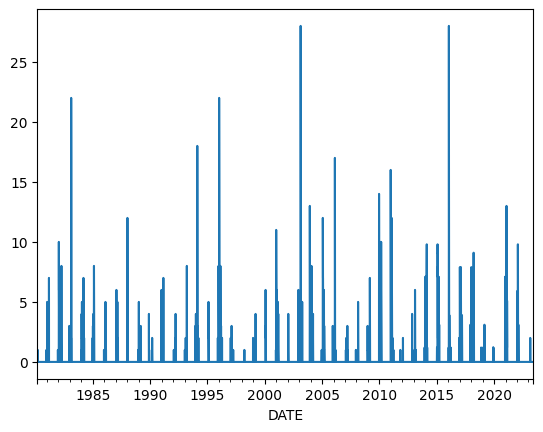

In [ ]:
weather["snwd"].plot()

In [ ]:
weather["target"] = weather.shift(-1)["tmax"]

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1980-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,24,8,26.0
1980-03-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,12,40.0
1980-03-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40,15,46.0
1980-03-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,26,43.0
1980-03-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.11,0.0,0.0,43,33,44.0
...,...,...,...,...,...,...,...,...
2023-06-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,70,54,70.0
2023-06-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,70,49,77.0
2023-06-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77,50,77.0


In [ ]:
weather = weather.ffill()

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1980-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,24,8,26.0
1980-03-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,12,40.0
1980-03-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40,15,46.0
1980-03-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,26,43.0
1980-03-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.11,0.0,0.0,43,33,44.0
...,...,...,...,...,...,...,...,...
2023-06-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,70,54,70.0
2023-06-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,70,49,77.0
2023-06-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77,50,77.0


In [ ]:
weather.corr()

<ipython-input-24-7abb8bc3d4be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.152948,0.000376,-0.007934,0.053595,-0.001469
snow,0.152948,1.000000,0.231776,-0.173838,-0.157901,-0.172122
snwd,0.000376,0.231776,1.000000,-0.262018,-0.258132,-0.241720
tmax,-0.007934,-0.173838,-0.262018,1.000000,0.954633,0.913986
tmin,0.053595,-0.157901,-0.258132,0.954633,1.000000,0.913627
target,-0.001469,-0.172122,-0.241720,0.913986,0.913627,1.000000


<ipython-input-25-a3a54e697603>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = weather.corr()


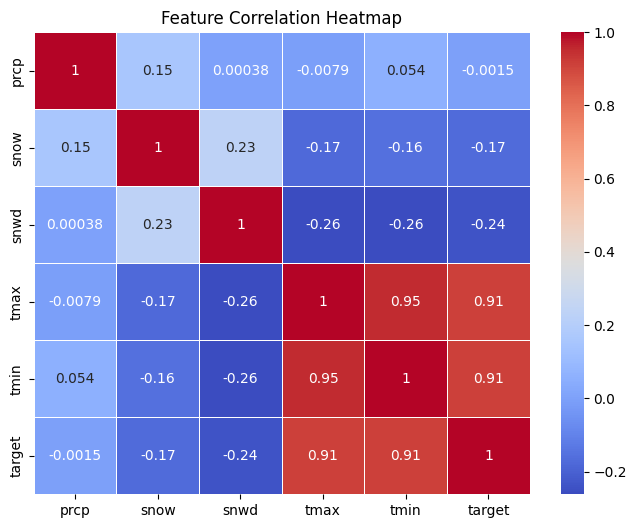

In [ ]:
%matplotlib inline
import seaborn as sns
correlation_matrix = weather.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [ ]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(weather, rr, predictors)

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
1990-02-27,39.0,36.081397,2.918603
1990-02-28,40.0,41.050957,1.050957
1990-03-01,48.0,39.985911,8.014089
1990-03-02,54.0,47.144169,6.855831
1990-03-03,40.0,52.386422,12.386422
...,...,...,...
2023-06-03,70.0,69.005570,0.994430
2023-06-04,77.0,66.477923,10.522077
2023-06-05,77.0,70.161287,6.838713


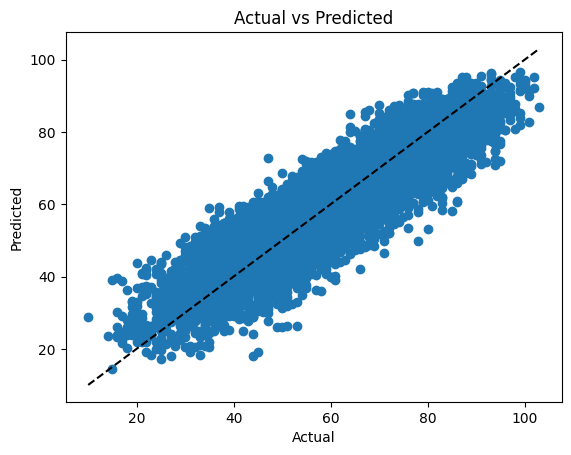

In [ ]:
import matplotlib.pyplot as plt

predictions = backtest(weather, rr, predictors)

plt.scatter(predictions['actual'], predictions['prediction'])
plt.plot([predictions['actual'].min(), predictions['actual'].max()],
         [predictions['actual'].min(), predictions['actual'].max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.1324998903970664

In [ ]:
predictions["diff"].mean()

5.1324998903970664

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,49.808207,28.191793
1998-03-26,80.0,53.123772,26.876228
1999-01-02,53.0,26.176116,26.823884
1990-03-12,85.0,58.187959,26.812041
2016-02-14,44.0,17.989278,26.010722
...,...,...,...
1991-09-24,72.0,72.002154,0.002154
1997-01-09,40.0,40.002131,0.002131
2006-12-27,49.0,48.997898,0.002102


In [ ]:
pd.Series(rr.coef_, index=predictors)

prcp   -1.101164
snow   -0.422765
snwd    0.061500
tmax    0.453743
tmin    0.507166
dtype: float64

In [ ]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [ ]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [ ]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1980-03-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,24,8,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,24.000000,24.000000,8.000000,8.000000,0.000000,0.000000
1980-03-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,26,12,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,25.000000,26.000000,10.000000,12.000000,0.000000,0.000000
1980-03-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,40,15,46.0,30.000000,0.333333,...,NaN,NaN,NaN,NaN,30.000000,40.000000,11.666667,15.000000,0.000000,0.000000
1980-03-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,26,43.0,37.333333,0.232143,...,NaN,NaN,NaN,NaN,34.000000,46.000000,15.250000,26.000000,0.000000,0.000000
1980-03-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.11,0.0,0.0,43,33,44.0,43.000000,0.000000,...,NaN,NaN,NaN,NaN,35.800000,43.000000,18.800000,33.000000,0.022000,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,70,54,70.0,75.000000,-0.066667,...,52.928571,0.020243,0.002143,-1.0,78.153132,73.568182,62.774169,58.386364,0.129049,0.137727
2023-06-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,70,49,77.0,73.000000,-0.041096,...,52.428571,-0.065395,0.002143,-1.0,78.146832,73.295455,62.763524,57.977273,0.128949,0.287727
2023-06-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,77,50,77.0,72.333333,0.064516,...,52.142857,-0.041096,0.002143,-1.0,78.145946,73.863636,62.753668,58.386364,0.128849,0.115000


In [ ]:
weather = weather.iloc[14:,:]



In [ ]:
weather = weather.fillna(0)

In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [ ]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.787845536786552

In [ ]:
mean_squared_error(predictions["actual"], predictions["prediction"])

37.57433942941221

In [ ]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,50.028661,27.971339
1998-03-26,80.0,52.196460,27.803540
2003-04-15,86.0,59.431315,26.568685
2022-12-23,16.0,41.451885,25.451885
1997-02-26,71.0,45.757742,25.242258
...,...,...,...
1996-06-16,79.0,79.001352,0.001352
1994-06-02,74.0,73.999075,0.000925
2014-08-25,82.0,82.000742,0.000742


In [ ]:
weather.loc["1990-03-07": "1990-04-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,...,25.000000,-0.440000,0.047857,-1.000000,48.741325,42.909091,34.025237,28.909091,0.121798,0.110000
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,...,24.071429,-0.169139,0.040714,-1.000000,48.710692,45.363636,33.981132,30.363636,0.121415,0.079091
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,...,22.785714,0.272727,0.031429,-0.681818,48.692790,45.909091,33.965517,31.090909,0.121066,0.026364
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,...,23.428571,0.664634,0.020714,-0.517241,48.687500,44.818182,33.981250,31.818182,0.120719,0.081818
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,...,25.500000,0.607843,0.021429,1.333333,48.719626,47.181818,34.003115,31.090909,0.120498,0.172727
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.751553,47.727273,34.031056,34.363636,0.120124,0.162727
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.863777,49.636364,34.052632,33.000000,0.119752,0.077273
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.904321,50.909091,34.089506,36.272727,0.119383,0.336364
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.923077,51.545455,34.116923,36.909091,0.119015,0.036364


<Axes: >

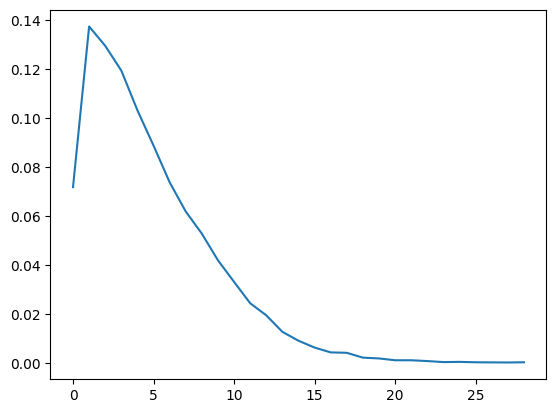

In [ ]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [ ]:
predictions


,actual,prediction,diff
DATE,,,
1990-03-13,62.0,61.472359,0.527641
1990-03-14,55.0,57.038178,2.038178
1990-03-15,62.0,53.876463,8.123537
1990-03-16,61.0,57.860656,3.139344
1990-03-17,59.0,56.609837,2.390163
...,...,...,...
2023-06-03,70.0,72.307630,2.307630
2023-06-04,77.0,70.424970,6.575030
2023-06-05,77.0,73.704296,3.295704


In [ ]:
# Load and split data
X = weather[predictors]
y = weather['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models
models = [
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(model.__class__.__name__)
    print("RMSE: ", rmse)
    print("R-squared: ", r2)

# Cross validation
def cross_validate(model, X, y, kf):
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        score = np.sqrt(mean_squared_error(y_test, y_pred))
        scores.append(score)
    return scores

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor()

rf_scores = cross_validate(rf, X, y, kf)
print("RF CV RMSE:", np.mean(rf_scores))

LinearRegression
RMSE:  6.109289880121365
R-squared:  0.8778483709638005
RandomForestRegressor
RMSE:  6.118719493956652
R-squared:  0.8774710008794536
GradientBoostingRegressor
RMSE:  6.098287867217534
R-squared:  0.8782879322617062
MLPRegressor
RMSE:  6.111955359109912
R-squared:  0.8777417583672737
RF CV RMSE: 6.133440247262594


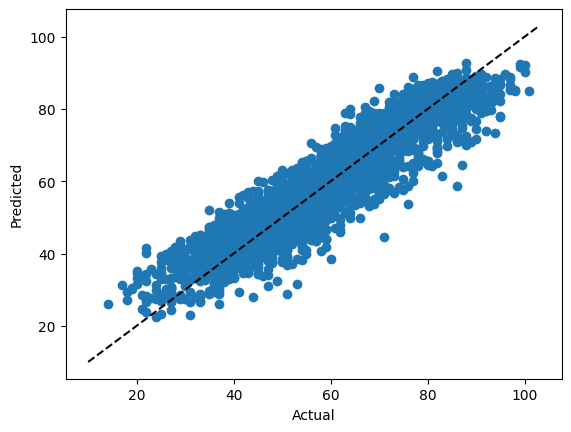

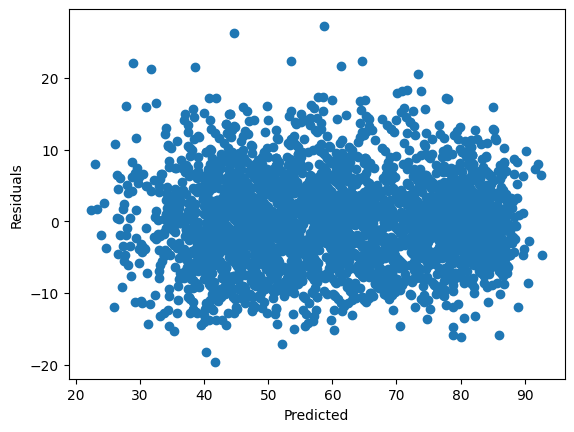

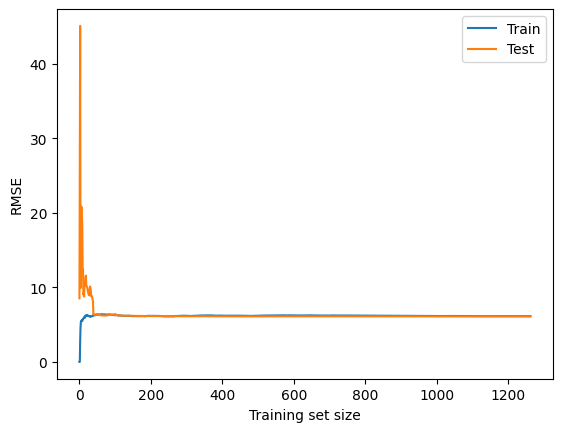

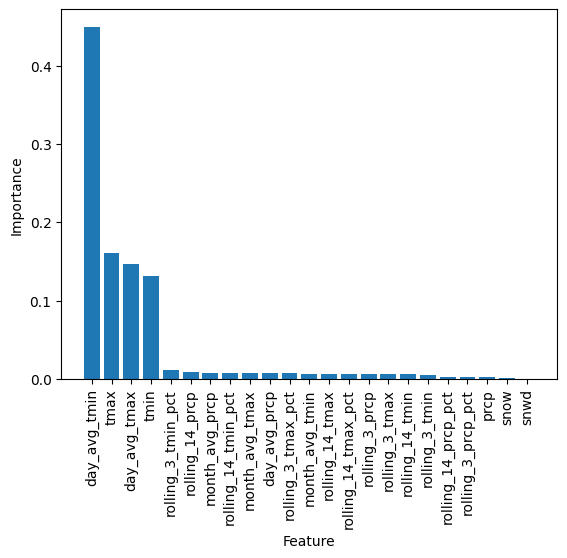

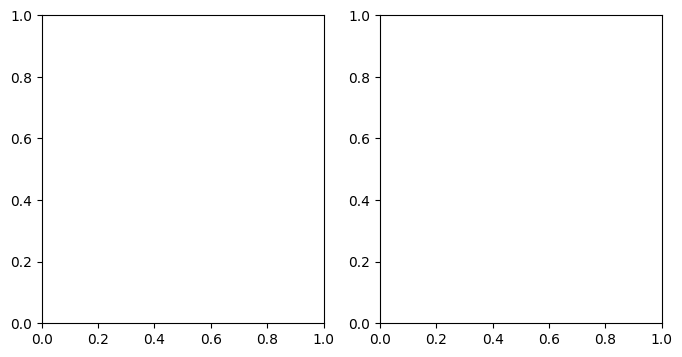

In [ ]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Residual plots
resid = y_test - y_pred
plt.scatter(y_pred, resid)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# Learning curves
linreg = LinearRegression()

train_rmse = []
test_rmse = []

for i in range(10, len(X_train), 10):
    linreg.fit(X_train[:i], y_train[:i])
    y_train_pred = linreg.predict(X_train[:i])
    y_test_pred = linreg.predict(X_test)

    train_rmse.append(np.sqrt(mean_squared_error(y_train[:i], y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.plot(train_rmse, label='Train')
plt.plot(test_rmse, label='Test')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')

# Partial dependence plots
from sklearn.inspection import partial_dependence

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
display = partial_dependence(rf, X_train, [0, 1])